# Model Deployment Mid Exam
### Calista Lianardi - 2702325880

#### Part 1: Preparing the dataset

**Importing Important Libraries**

In [3]:
#Basic Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocesing Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Machine Learning Model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb

#Model saving
import pickle

**Starting the preprocessing process**

In [5]:
#Loading the dataset

df = pd.read_csv('Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
#Checking the dataset info such as data type for each collumn and missing value chance

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We can see that from this table, there are 3 column with different Non-Null value, which is type_of_meal_plan, required_car_parking_space, and avg_price_per_rooms. next we going to see how much actually each of column's missing value

In [8]:
df.isnull().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

from this we know the missing value excact count, but to know what to do with this missing value, we gotta see the percentage of each missing value. from the knowledge i have, if the missing value is more than 30% it usually just get dropped out because imputing it won't do any good, but if it's less then we can impute it using whichever way is best

In [10]:
# Finding out how many percent the missing value from the entire dataset

print(f"Missing Value of type_of_meal_plan: {df['type_of_meal_plan'].isnull().mean() * 100:.2f}%")
print(f"Missing Value of required_car_parking_space: {df['required_car_parking_space'].isnull().mean() * 100:.2f}%")
print(f"Missing Value of avg_price_per_room: {df['avg_price_per_room'].isnull().mean() * 100:.2f}%")

Missing Value of type_of_meal_plan: 2.50%
Missing Value of required_car_parking_space: 3.50%
Missing Value of avg_price_per_room: 4.50%


we see that each of the missing value are not more than 30%, not even reach 10% of total data which is a good thing, then we can impute this missing value instead using mode for categorical variable (type_of_meal_plan) and mean or median for the rest numerical variable

In [12]:
# Checking the summary statistic for numeric columns

df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


no negative or anomaly value found from this table, we're going to pass it for now

In [14]:
#Checking duplicated value

df.duplicated().sum()

0

In [15]:
#Identify and explore cateforical variable, checking cardinality

cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", cat_col, "\n")

for col in cat_col:
    print(f'--- {col} ---')
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False).apply(lambda x: f'{x:.2%}')
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(summary)
    print()

Categorical Columns: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'] 

--- Booking_ID ---
            Count Percentage
Booking_ID                  
INN00001        1      0.00%
INN24187        1      0.00%
INN24181        1      0.00%
INN24182        1      0.00%
INN24183        1      0.00%
...           ...        ...
INN12086        1      0.00%
INN12085        1      0.00%
INN12084        1      0.00%
INN12083        1      0.00%
INN36275        1      0.00%

[36275 rows x 2 columns]

--- type_of_meal_plan ---
                   Count Percentage
type_of_meal_plan                  
Meal Plan 1        27157     74.86%
Not Selected        4986     13.75%
Meal Plan 2         3220      8.88%
NaN                  907      2.50%
Meal Plan 3            5      0.01%

--- room_type_reserved ---
                    Count Percentage
room_type_reserved                  
Room_Type 1         28130     77.55%
Room_Type 4          6057     16.70%
R

In [16]:
# Seeing how many unique value each c ategorical data has

cat_summary = df[cat_col].nunique().sort_values()
print(cat_summary)

booking_status             2
type_of_meal_plan          4
market_segment_type        5
room_type_reserved         7
Booking_ID             36275
dtype: int64


from this checking we see that Booking ID have too many unique value (which is logic due to its nature of being ID) we can see the rest of the categorical value has maximumm 7 unique value, making it's cardinality low. from this we know that we will use one hot encoding for this categorical value, and for booking status we'll just do label encoding due to it being the target variable

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


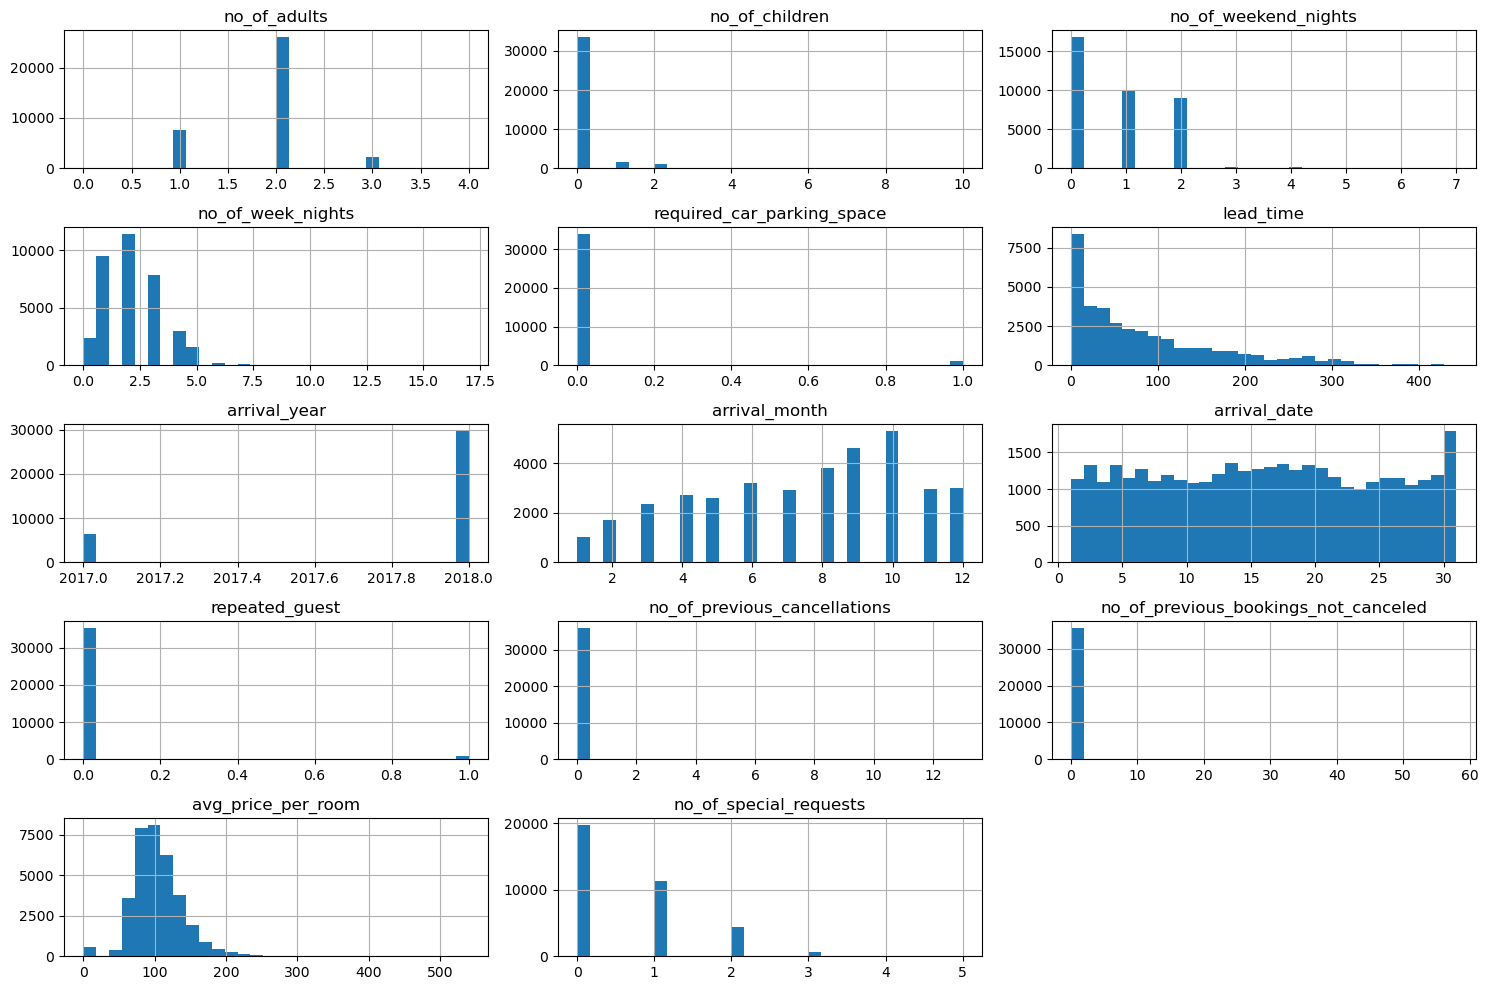

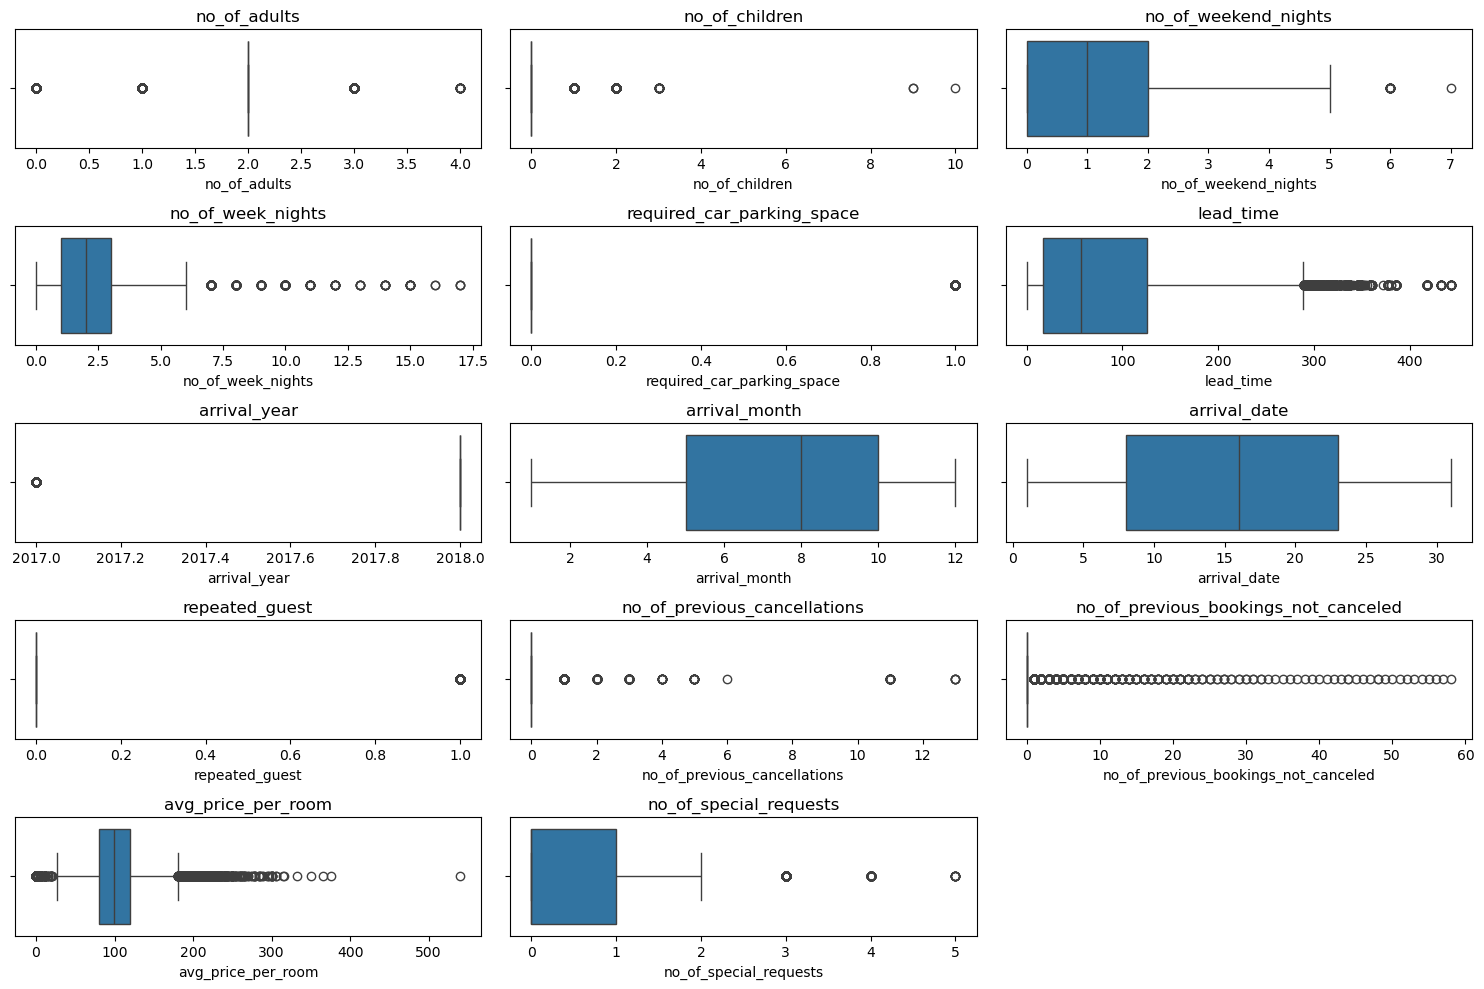

In [18]:
# Identifying and exploring the numerical variable
num_col = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_col)

# Plot histograms for each numerical column
df[num_col].hist(bins=30, figsize=(15, 10), layout=(len(num_col)//3+1, 3))
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for idx, col in enumerate(num_col):
    plt.subplot((len(num_col) // 3) + 1, 3, idx + 1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


next step is identifying the numercal variable here, we can see that in certain column, there are quite plenty of outlier, it could happen if there are too many certain value in that column such as in no_of_previous_booking_not_canceled and no_of_children with too many 0, and no_of_adults with too many 2.

here we can also identify the previous column with missing value distribution, usually we use mean if the distribution is bell shaped, meaning the variance is evenly distributed, and we use median if the distribution is skewed. 
here we notice that one of our numerical value actually just having binary value which is 0 and 1, thus we cannot determine whether it skewed or even, so we'll just do mode imputation for this one and treating it as a categorical, and do median for the rest as it's distribution is skewed.

for the value that is not only discrete but continously distributed such as lead_time, and unusual value in no_of_week_nights and no_of_weekend_nights, we understand that that's true outlier on the data. but since the model we use is tree Random Forest Classifier and XGBoost which is robust for outlier, we don't need and i choose to not scale, log, or drop the outlier and instead let them learn more from the outlier. 

We also don't scale the numerical variable due to same reason of not handling the outlier: Tree Based model, because it works by spliting data by thresholds, so it doesn't matter what the range is the model will just found the best way to split and separate the target. scaling will not improve performance and might be a wasteful process so we choose to keep the numerical value as it is

In [20]:
#Handling the missing value

## a. For the categorical variable (type_of_meal_plan )

df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])

counts = df['type_of_meal_plan'].value_counts(dropna=False)
percentages = df['type_of_meal_plan'].value_counts(normalize=True, dropna=False).apply(lambda x: f'{x:.2%}')
summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(summary)

                   Count Percentage
type_of_meal_plan                  
Meal Plan 1        28064     77.36%
Not Selected        4986     13.75%
Meal Plan 2         3220      8.88%
Meal Plan 3            5      0.01%


In [21]:
## b. for the numerical variable (required_car_parking_space & avg_price_per_room )

#required parking space (binary looking 0.0 and 0.1)
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(df['required_car_parking_space'].mode()[0])
counts = df['required_car_parking_space'].value_counts(dropna=False)
percentages = df['required_car_parking_space'].value_counts(normalize=True, dropna=False).apply(lambda x: f'{x:.2%}')
summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(summary)

                            Count Percentage
required_car_parking_space                  
0.0                         35180     96.98%
1.0                          1095      3.02%


In [22]:
#average price per room

df['avg_price_per_room'] = df['avg_price_per_room'].fillna(df['avg_price_per_room'].median())
print(f"Missing Value of required_car_parking_space: {df['required_car_parking_space'].isnull().mean() * 100:.2f}%")
print(f"Missing Value of avg_price_per_room: {df['avg_price_per_room'].isnull().mean() * 100:.2f}%")

Missing Value of required_car_parking_space: 0.00%
Missing Value of avg_price_per_room: 0.00%


In [23]:
# Dropping the unneccessary column (Booking ID)

df.drop(columns='Booking_ID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  float64
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

**Encoding the categorical variable**

for i explain before that the cardinality of categorical variable is low, we use one-hot encoding, we will turn this model into streamlit app, meaning we need to make sure the input stays the same amount with the column, or atleast keeping it in one column for each feature toavoid confusion. Tree based model also less sensitive to label encoding because it algorithm will just split and split so we will use label encoding for all

In [25]:
# Doing label encoding for categorical variable

encode_cols = ['type_of_meal_plan','market_segment_type','room_type_reserved', 'booking_status']
df_processed = df.copy()

encoders = {}

for col in encode_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    encoders[col] = le

df_processed

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0.0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0.0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0.0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0.0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0.0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0.0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0.0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0.0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0.0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [26]:
for col in encode_cols:
    print(f"\nMapping for '{col}':")
    for i, class_ in enumerate(encoders[col].classes_):
        print(f"{class_} → {i}")



Mapping for 'type_of_meal_plan':
Meal Plan 1 → 0
Meal Plan 2 → 1
Meal Plan 3 → 2
Not Selected → 3

Mapping for 'market_segment_type':
Aviation → 0
Complementary → 1
Corporate → 2
Offline → 3
Online → 4

Mapping for 'room_type_reserved':
Room_Type 1 → 0
Room_Type 2 → 1
Room_Type 3 → 2
Room_Type 4 → 3
Room_Type 5 → 4
Room_Type 6 → 5
Room_Type 7 → 6

Mapping for 'booking_status':
Canceled → 0
Not_Canceled → 1


**Preparing the data for training and testing**

In [84]:
x = df_processed.drop(columns=['booking_status', 'arrival_year','arrival_month', 'arrival_date'])
y = df_processed['booking_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
#Checking the type of each train and test input for the model

print(type(x_train))  
print(type(y_train))  
print(type(x_test))   
print(type(y_test))   

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [88]:
#Altering the datatype to numpy

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

print(type(x_train))  
print(type(y_train))  
print(type(x_test))   
print(type(y_test))   

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Checking the input to become numpy array are essential because numpy array can be used directly and are generally more efficient for large datasets. We also will input manually each data to the model, not a whole dataframe to the prediction, so we'll need to retain it's array shape, especially where we will put this into streamlit, we'll pass the input manually by users input.

**Initiate Modeling**

In [92]:
#Creating analysis metrics

def run_it (model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predx = model.predict(x_test)
    
    print(classification_report(y_test,predx))
    
    matrix = confusion_matrix(y_test,predx)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    disp.plot()
    plt.show()

In [94]:
#Pre-GridSearch model initialization

#Random Forest
rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

#XGBoost
xgbs = xgb.XGBClassifier()
xgbs.fit(x_train, y_train)
xgbs_pred = xgbs.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2416
           1       0.90      0.93      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255



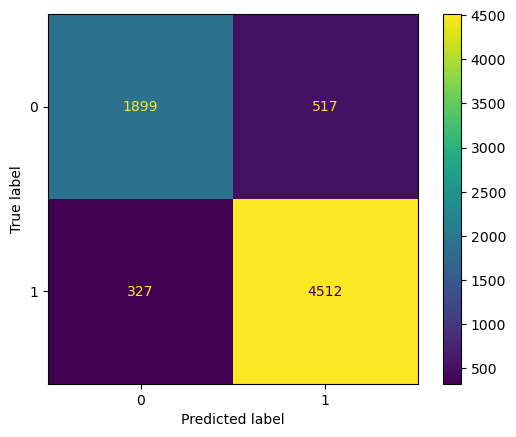

In [95]:
#Random Forrest Pre-GridSearch Model Evaluation

run_it(rf,x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      2416
           1       0.89      0.93      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.88      0.88      0.88      7255



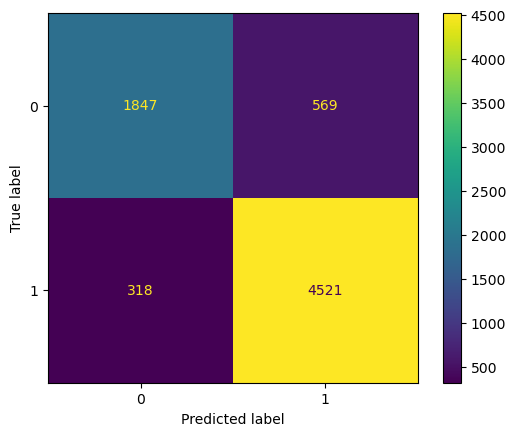

In [96]:
#XGBoost Pre-GridSearch Model Evaluation

run_it(xgbs,x_train, x_test, y_train, y_test)

In [97]:
#define parameter grids for rf and sgb

rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy', 'log_loss']
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.2, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.75, 0.8, 1.0],
    'gamma' : [0, 0.1, 0.2]
}

In [98]:
# Grid search for random forest

rf_gridsearch = GridSearchCV(estimator = rf, 
                             param_grid = rf_param_grid,
                             cv=3, 
                             scoring='accuracy', 
                             n_jobs=-1)
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [99]:
# Grid search for xgboost


xgb_gridsearch = GridSearchCV(estimator = xgbs,
                              param_grid = xgb_param_grid,
                              cv=3,
                              n_jobs=-1,
                              scoring='accuracy')
xgb_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.75, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.4, 0.5, 0.6, 0.8, 1.0]},
             scoring='accuracy')

In [100]:
print('Random Forest Tuned Hyperparameter :', rf_gridsearch.best_params_)
print('Random Forest Best Accurracy: ', rf_gridsearch.best_score_)
print()
print('XGBoost Tuned Hyperparameter :', xgb_gridsearch.best_params_)
print('XGBoost Best Accurracy: ', xgb_gridsearch.best_score_)

Random Forest Tuned Hyperparameter : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Accurracy:  0.8801859536069355

XGBoost Tuned Hyperparameter : {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Best Accurracy:  0.8786009811868712


**Model Evaluation Analysis**

In [108]:
# Post-GridSearch model initialization

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_2 = RandomForestClassifier(
    random_state=123, 
    criterion='gini', 
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200
)
rf_2.fit(x_train, y_train)
rf_pred = rf_2.predict(x_test)

# XGBoost
import xgboost as xgb

xgbs_2 = xgb.XGBClassifier(
    colsample_bytree=0.6, 
    gamma=0, 
    learning_rate=0.1, 
    max_depth=9, 
    n_estimators=200, 
    subsample=1.0,
    random_state=123
)
xgbs_2.fit(x_train, y_train)
xgbs_pred = xgbs_2.predict(x_test)


              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2416
           1       0.89      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.88      7255



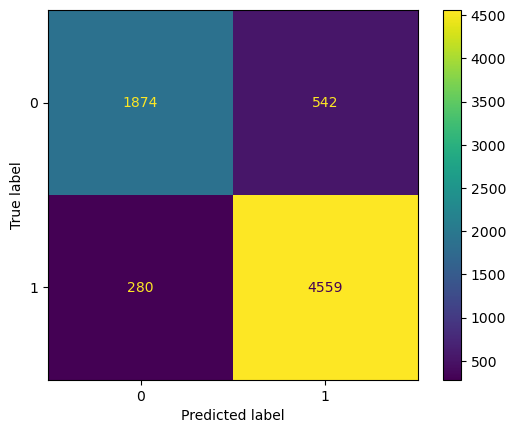

In [109]:
#Random Forrest Post-GridSearch Model Evaluation

run_it(rf_2,x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2416
           1       0.89      0.94      0.92      4839

    accuracy                           0.88      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255



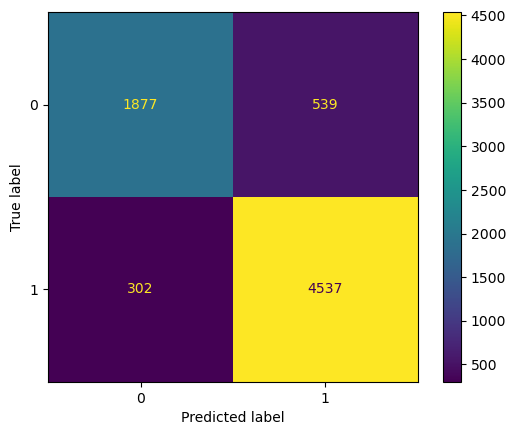

In [110]:
#XGBoost Post-GridSearch Model Evaluation

run_it(xgbs_2,x_train, x_test, y_train, y_test)

**Metrics Evaluation**

1. Accuracy
   - Random Forest achieved 89% of accuracy while XGBoost getting 88%
   - By this mean, Random Forest slightly outperforms XGBoost in terms of overall accuracy, correctly predicting more test samples. And both model demonstrate good performance by reaching >80% accuracy in this model
    
2. F1-Score (Weighted Average)
    - Random Forest average F1 score are 0.88, while XGBoost's also achieve on 0.88
    - Though both models perform equally on this metric, it's worth noting that Random Forest's performance remains consistent across other metrics as well, adding to its reliability.
    
3. Class Specific Performance
    - in Class 0, Random Forest achieved a precision of 0.87, recall of 0.78, and F1-score of 0.82, whereas XGBoost scored slightly lower with a precision of 0.86, same recall of 0.78, and the same F1-score of 0.82. This indicates that while both models perform well in detecting Class 0, Random Forest has a slight edge in recall, meaning it was better at identifying the actual positive cases for this class.
    - in Class 1, which is the majority class with the highest support (4,839 samples), both models performed very strongly. Both model achieved a precision of 0.89, recall of 0.94, and F1-score of 0.92, This suggests that both models are highly effective at identifying Class 1, with Random Forest being just slightly better in terms of capturing true positives.
    - In terms of macro average, which evaluates the performance across classes equally regardless of their support, Random Forest outperformed XGBoost with a precision of 0.88 vs. 0.88, recall of 0.86 vs. 0.86, and F1-score of 0.87 vs. 0.87. While the differences are minor, they indicate that **Random Forest has a more balanced performance across both classes**.




**Conclusion**

While both Random Forest and XGBoost exhibit strong performance in this binary classification task, Random Forest has a slight edge in true positives and precision for the minority class, suggesting better overall generalization and a slightly more balanced performance. Given these observations, **Random Forest is chosen as the preferred model to be trained in our OOP deployment pipeline.**

#### **Saving the model to pickle**

In [123]:
with open('CL_ranfor_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [125]:
#Casually checking where will it be saved
import os
print(os.getcwd())

C:\Users\liana\Mid Exam MD
